# Mohamed Eslam
# Mohamd Sherif
# Mohamed Twfik
## Sec: 3

<a name='1'></a>
## 1 - Packages

As usual, begin by loading in the packages.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

<a name='1-1'></a>
### 1.1 - Load the Data and Split the Data into Train/Test Sets

You'll be using the Happy House dataset for this part of the assignment, which contains images of peoples' faces. Your task will be to build a ConvNet that determines whether the people in the images are smiling or not -- because they only get to enter the house if they're smiling!  

In [7]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


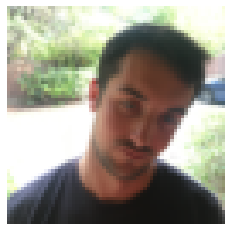

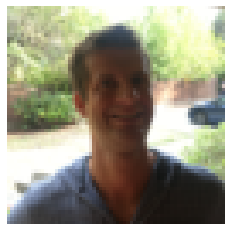

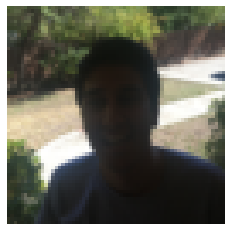

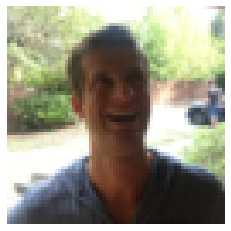

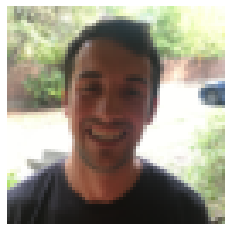

In [8]:
#display sample training image
for i in np.arange(5):
    plt.figure()
    plt.imshow(X_train_orig[i]);
    plt.axis("off");

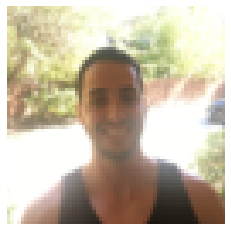

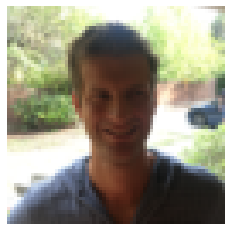

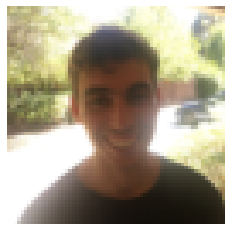

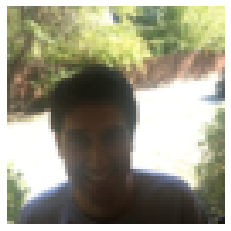

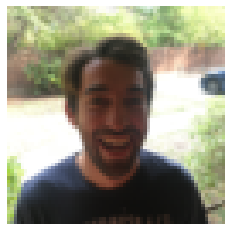

In [9]:
#display sample training image
for i in np.arange(5):
    plt.figure()
    plt.imshow(X_test_orig[i]);
    plt.axis("off");

<a name='3'></a>
## 3 - The Sequential API

For the first part of this assignment, you'll create a model using TF Keras' Sequential API, which allows you to build layer by layer, and is ideal for building models where each layer has **exactly one** input tensor and **one** output tensor. 

As you'll see, using the Sequential API is simple and straightforward, but is only appropriate for simpler, more straightforward tasks. Later in this notebook you'll spend some time building with a more flexible, powerful alternative: the Functional API. 
 


# happyModel

Implement the `happyModel` function below to build the following model: `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Take help from [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 

Also, plug in the following parameters for all the steps:

 - [ZeroPadding2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ZeroPadding2D): padding 3, input shape 64 x 64 x 3
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 32 7x7 filters, stride 1
 - [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization): for axis 3
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Using default parameters
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 1 neuron and a sigmoid activation. 
 
 
 **Hint:**
 
 Use **tfl** as shorthand for **tensorflow.keras.layers**

In [10]:
# GRADED FUNCTION: happyModel

def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([
           
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tfl.ZeroPadding2D(padding=(3, 3), input_shape=(64, 64, 3)),
            ## Conv2D with 32 7x7 filters and stride of 1(defalt 1)
            tfl.Conv2D(32, (7,7)),
            ## BatchNormalization for axis 3
            tfl.BatchNormalization(axis=-1),
            ## ReLU
            tfl.ReLU(),
            ## Max Pooling 2D with default parameters
            tfl.MaxPool2D(),
            ## Flatten layer is 
            tfl.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tfl.Dense(1, activation='sigmoid')
            
        ])
    
    return model

Now that your model is created, you can compile it for training with an optimizer and loss of your choice. When the string `accuracy` is specified as a metric, the type of accuracy used will be automatically converted based on the loss function used. This is one of the many optimizations built into TensorFlow that make your life easier! If you'd like to read more on how the compiler operates, check the docs [here](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile).

In [11]:
happy_model = happyModel()

happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

It's time to check your model's parameters with the `.summary()` method. This will display the types of layers you have, the shape of the outputs, and how many parameters are in each layer. 

In [12]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 70, 70, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

<a name='3-2'></a>
### 3.2 - Train and Evaluate the Model

After creating the model, compiling it with your choice of optimizer and loss function, and doing a sanity check on its contents, you are now ready to build! 

Simply call `.fit()` to train. That's it! No need for mini-batching, saving, or complex backpropagation computations. That's all been done for you, as you're using a TensorFlow dataset with the batches specified already. You do have the option to specify epoch number or minibatch size if you like (for example, in the case of an un-batched dataset).

In [13]:
hist = happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 11s 232ms/step - loss: 1.2332 - accuracy: 0.7233
Epoch 2/10
38/38 [==============================] - 24s 638ms/step - loss: 0.2149 - accuracy: 0.9200
Epoch 3/10
38/38 [==============================] - 19s 497ms/step - loss: 0.1729 - accuracy: 0.9350
Epoch 4/10
38/38 [==============================] - 24s 616ms/step - loss: 0.4581 - accuracy: 0.8433
Epoch 5/10
38/38 [==============================] - 10s 273ms/step - loss: 0.1856 - accuracy: 0.9367
Epoch 6/10
38/38 [==============================] - 14s 373ms/step - loss: 0.1206 - accuracy: 0.9533
Epoch 7/10
38/38 [==============================] - 12s 311ms/step - loss: 0.0938 - accuracy: 0.9667
Epoch 8/10
38/38 [==============================] - 11s 293ms/step - loss: 0.1017 - accuracy: 0.9717
Epoch 9/10
38/38 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.98 - 10s 260ms/step - loss: 0.0588 - accuracy: 0.9817
Epoch 10/10
38/38 [==============================

After that completes, just use `.evaluate()` to evaluate against your test set. This function will print the value of the loss function and the performance metrics specified during the compilation of the model. In this case, the `binary_crossentropy` and the `accuracy` respectively.

In [14]:
ModelLoss, ModelAccuracy = happy_model.evaluate(X_test, Y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

5/5 [==============================] - 1s 119ms/step - loss: 0.1652 - accuracy: 0.9533
Test Loss is 0.165181964635849
Test Accuracy is 0.95333331823349


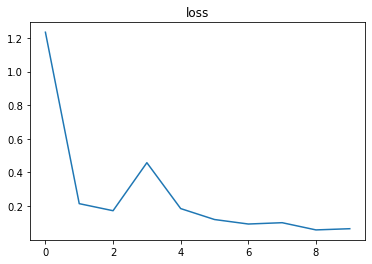

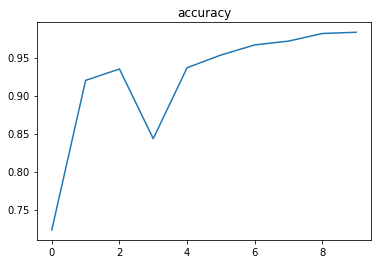

In [15]:
for i in hist.history.keys():
    plt.figure()
    plt.plot(hist.history[i]);
    plt.title(str(i))

In [16]:
#now to predict X test

y_pred = happy_model.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (150, 1)


In [17]:
#get the predictions for the test data
predicted_classes = happy_model.predict_classes(X_test)
predicted_classes

C:\Users\mohammed\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
    

In [18]:
df = pd.DataFrame(predicted_classes,columns=["class"])
df['class'] = df['class'].apply(str)
df["class"].replace({"0": "Not Happy", "1": "Happy"}, inplace=True)
df.head()

,class
0,Happy
1,Happy
2,Happy
3,Happy
4,Not Happy


Text(0.5, 1.0, 'Not Happy')

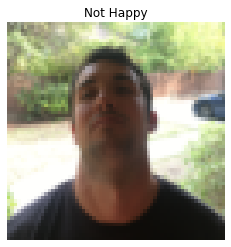

In [19]:
# test with rondom values
x=50
plt.figure()
plt.imshow( X_test_orig[x]);
plt.axis("off");
plt.title(df['class'].values[x])

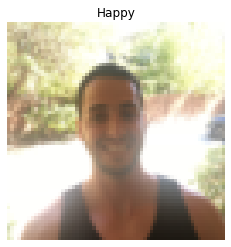

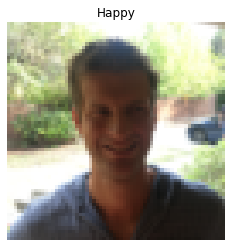

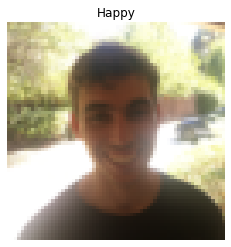

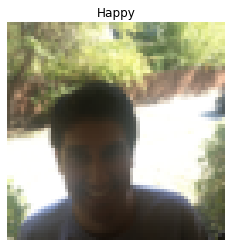

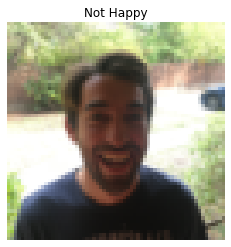

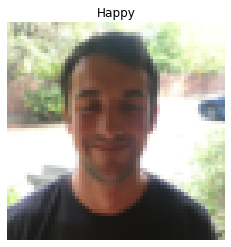

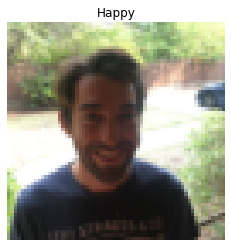

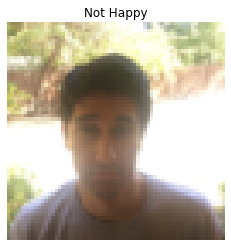

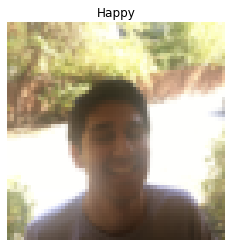

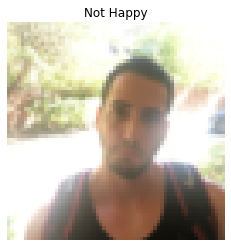

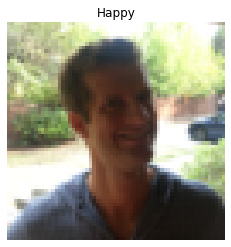

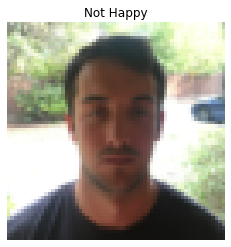

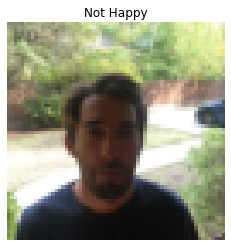

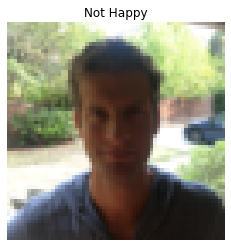

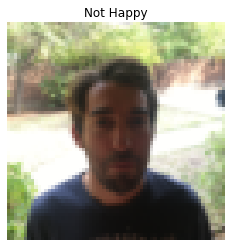

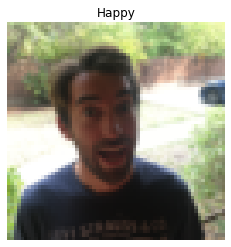

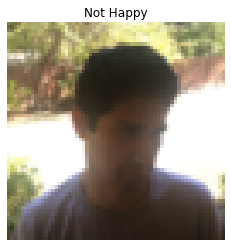

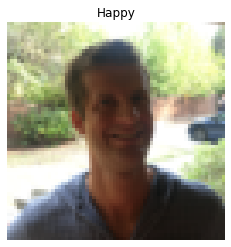

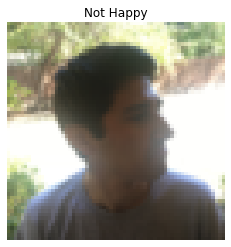

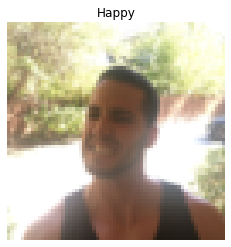

In [20]:
#test The first 20 rows
for i in np.arange(20):
    plt.figure()
    plt.imshow( X_test_orig[i]);
    plt.axis("off");
    plt.title(df['class'].values[i])